# Coffee Shop Sales

In [1699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import calendar

In [1700]:
df=pd.read_excel('CoffeeShopSales.xlsx')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [1701]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [1702]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [1703]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'],format='%H:%M:%S').dt.time

In [1704]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [1705]:
df["Month_name"]=df["transaction_date"].dt.month_name()

In [1706]:
df["week_name"]=df["transaction_date"].dt.strftime('%A')

In [1707]:
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [1708]:
df.duplicated().sum()


0

In [1709]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [1710]:
df.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [1711]:
df.product_category.value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [1712]:
df.product_category

0                     Coffee
1                        Tea
2         Drinking Chocolate
3                     Coffee
4                        Tea
                 ...        
149111                   Tea
149112                   Tea
149113                   Tea
149114                Coffee
149115              Flavours
Name: product_category, Length: 149116, dtype: object

In [1713]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']

In [1714]:
abc=df[df.store_location == 'Lower Manhattan']
abc

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month_name,week_name,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,Sunday,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,Sunday,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,Sunday,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149045,149386,2023-06-30,18:28:56,2,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,June,Friday,4.00
149046,149387,2023-06-30,18:30:02,1,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,June,Friday,4.50
149047,149388,2023-06-30,18:30:02,1,5,Lower Manhattan,72,3.25,Bakery,Scone,Ginger Scone,June,Friday,3.25
149094,149435,2023-06-30,19:40:09,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,June,Friday,7.00


In [1715]:
abc.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [1716]:
abc.product_category.value_counts()

product_category
Coffee                18204
Tea                   13912
Bakery                 7890
Drinking Chocolate     3405
Flavours               2930
Coffee beans            531
Loose Tea               381
Branded                 349
Packaged Chocolate      180
Name: count, dtype: int64

In [1717]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month_name,week_name,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,Sunday,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,Sunday,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,Sunday,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,Friday,5.00
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,Friday,6.00
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,Friday,3.00
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,Friday,3.75


In [1718]:
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

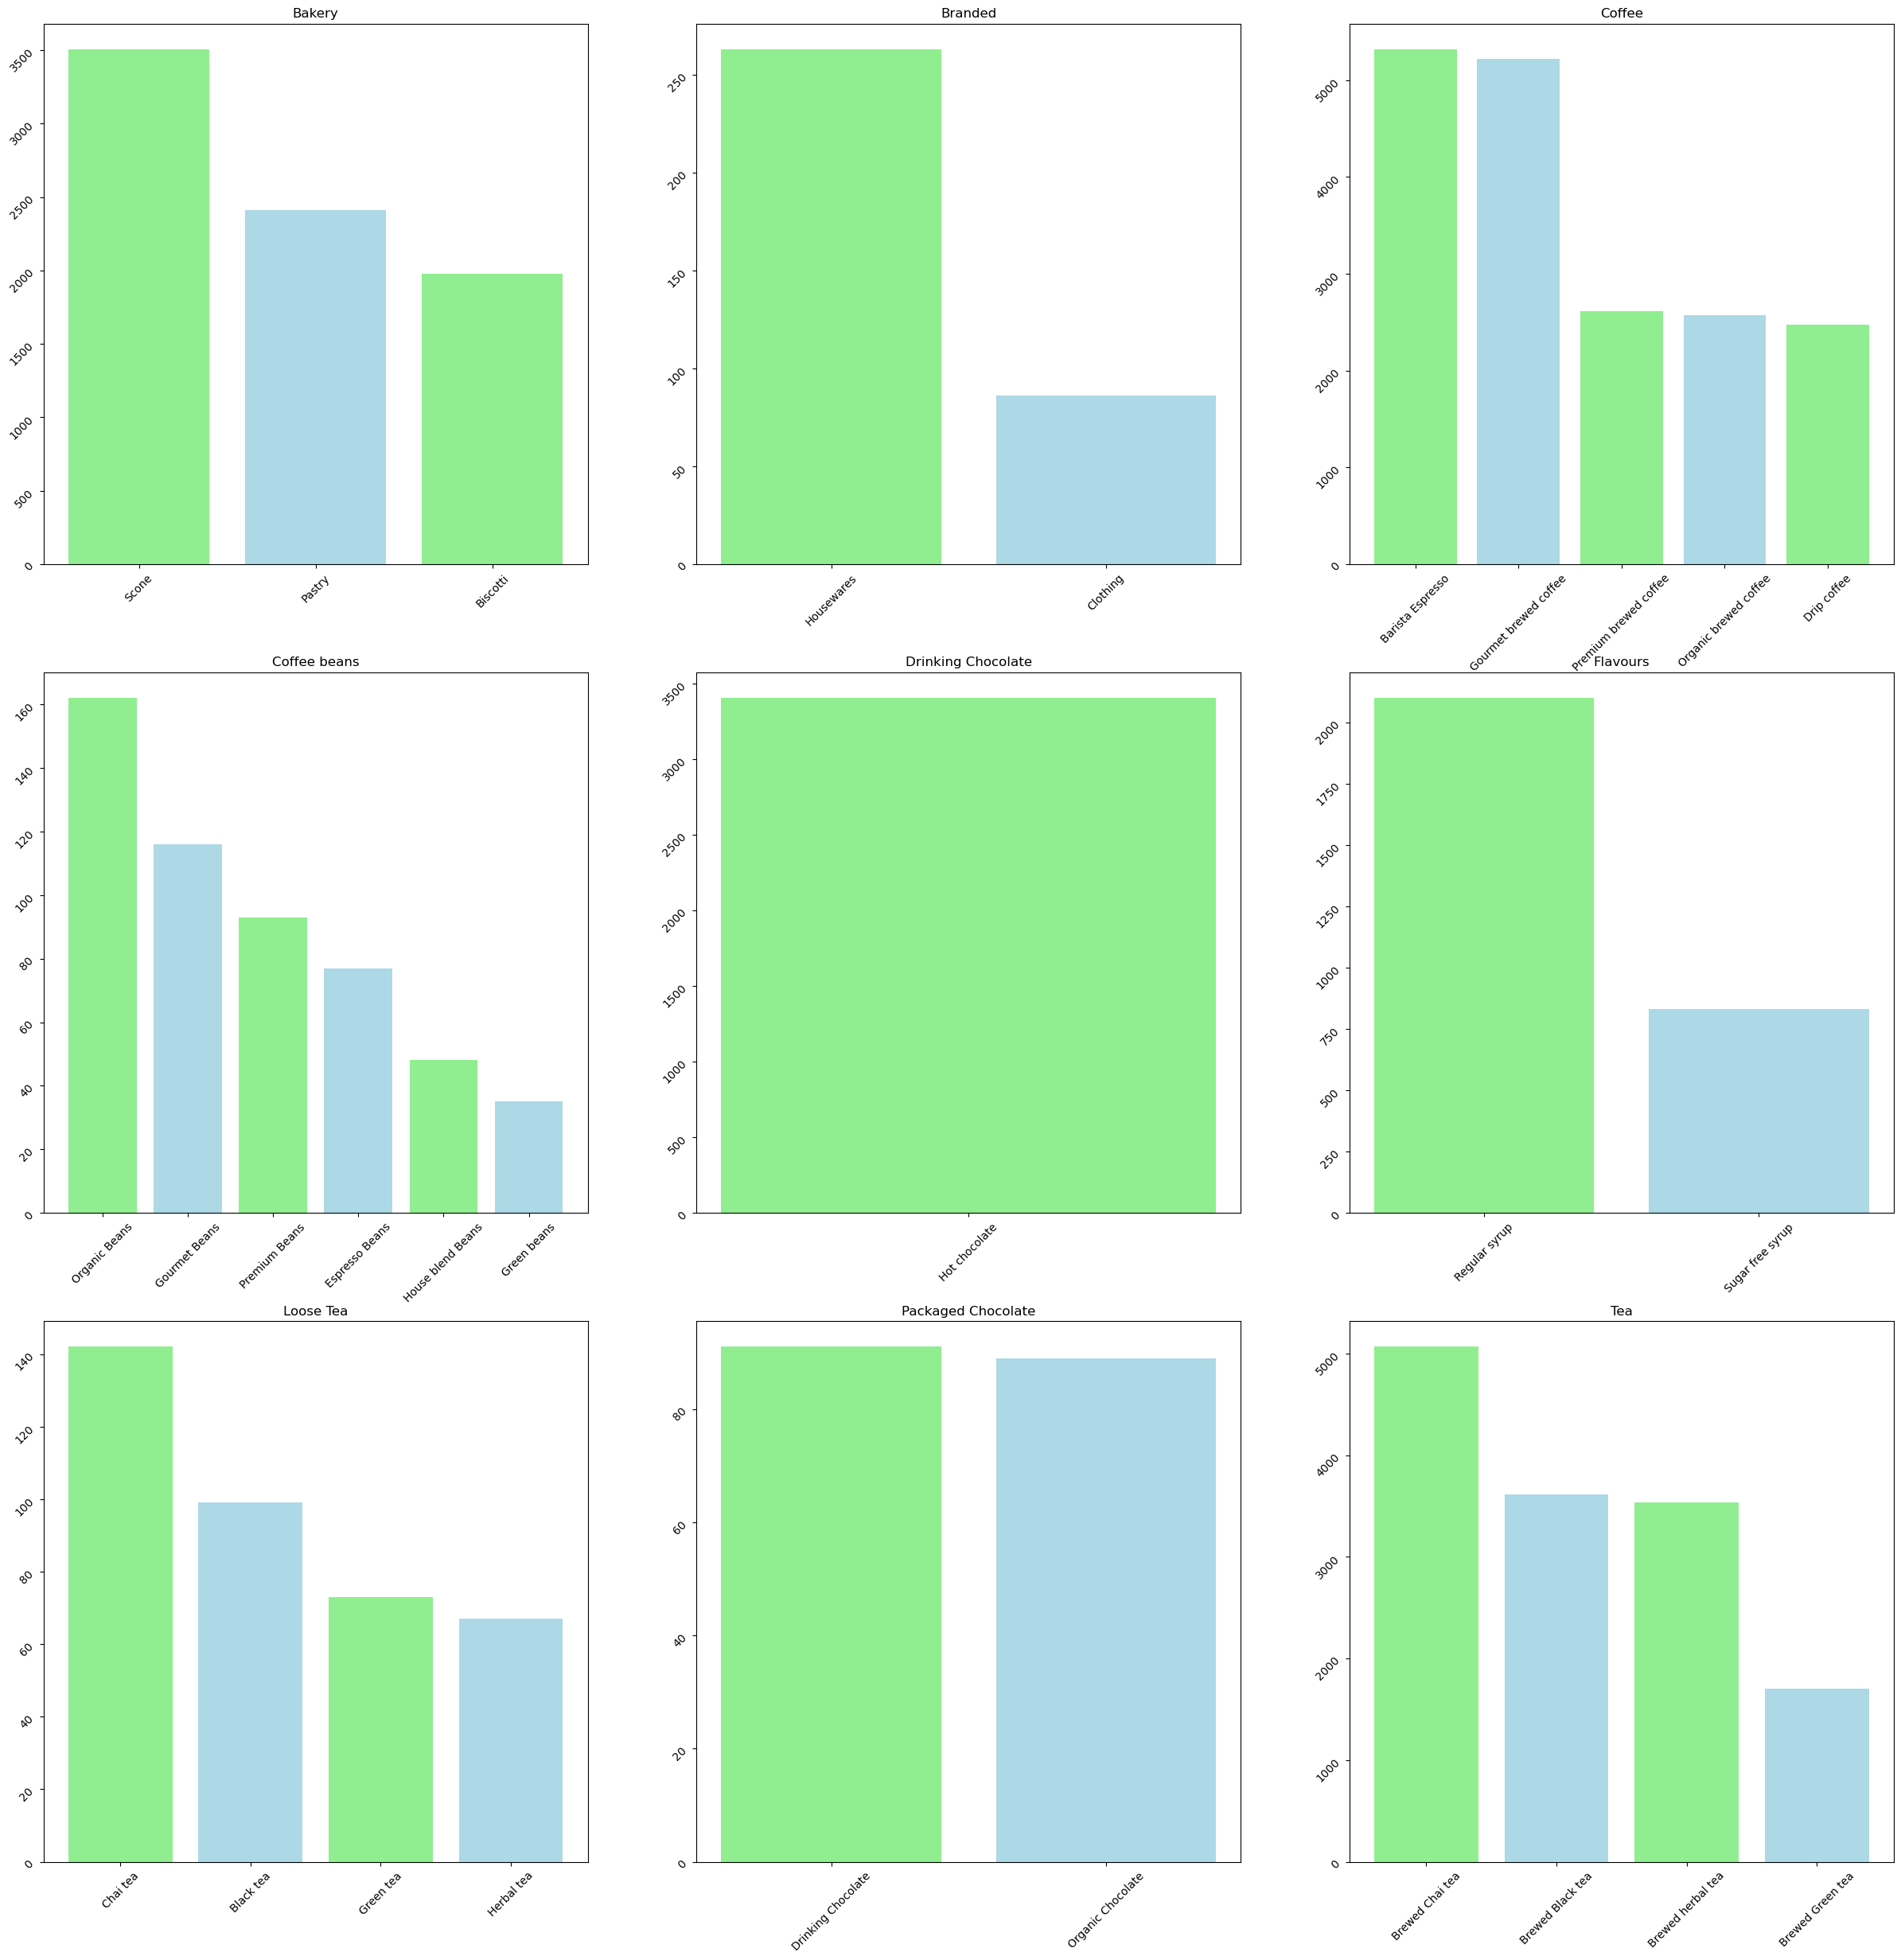

In [1719]:
lm = df[df.store_location == 'Lower Manhattan']
grouped = lm.groupby('product_category')['product_type'].value_counts()
categories = grouped.unstack().index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(30,30))

axes = axes.flatten()

for i, items in enumerate(categories):
    axes[i].bar(grouped[items].index, grouped[items].values,color=['lightgreen','lightblue'])
    axes[i].tick_params(rotation=45)
    axes[i].set_title(items)

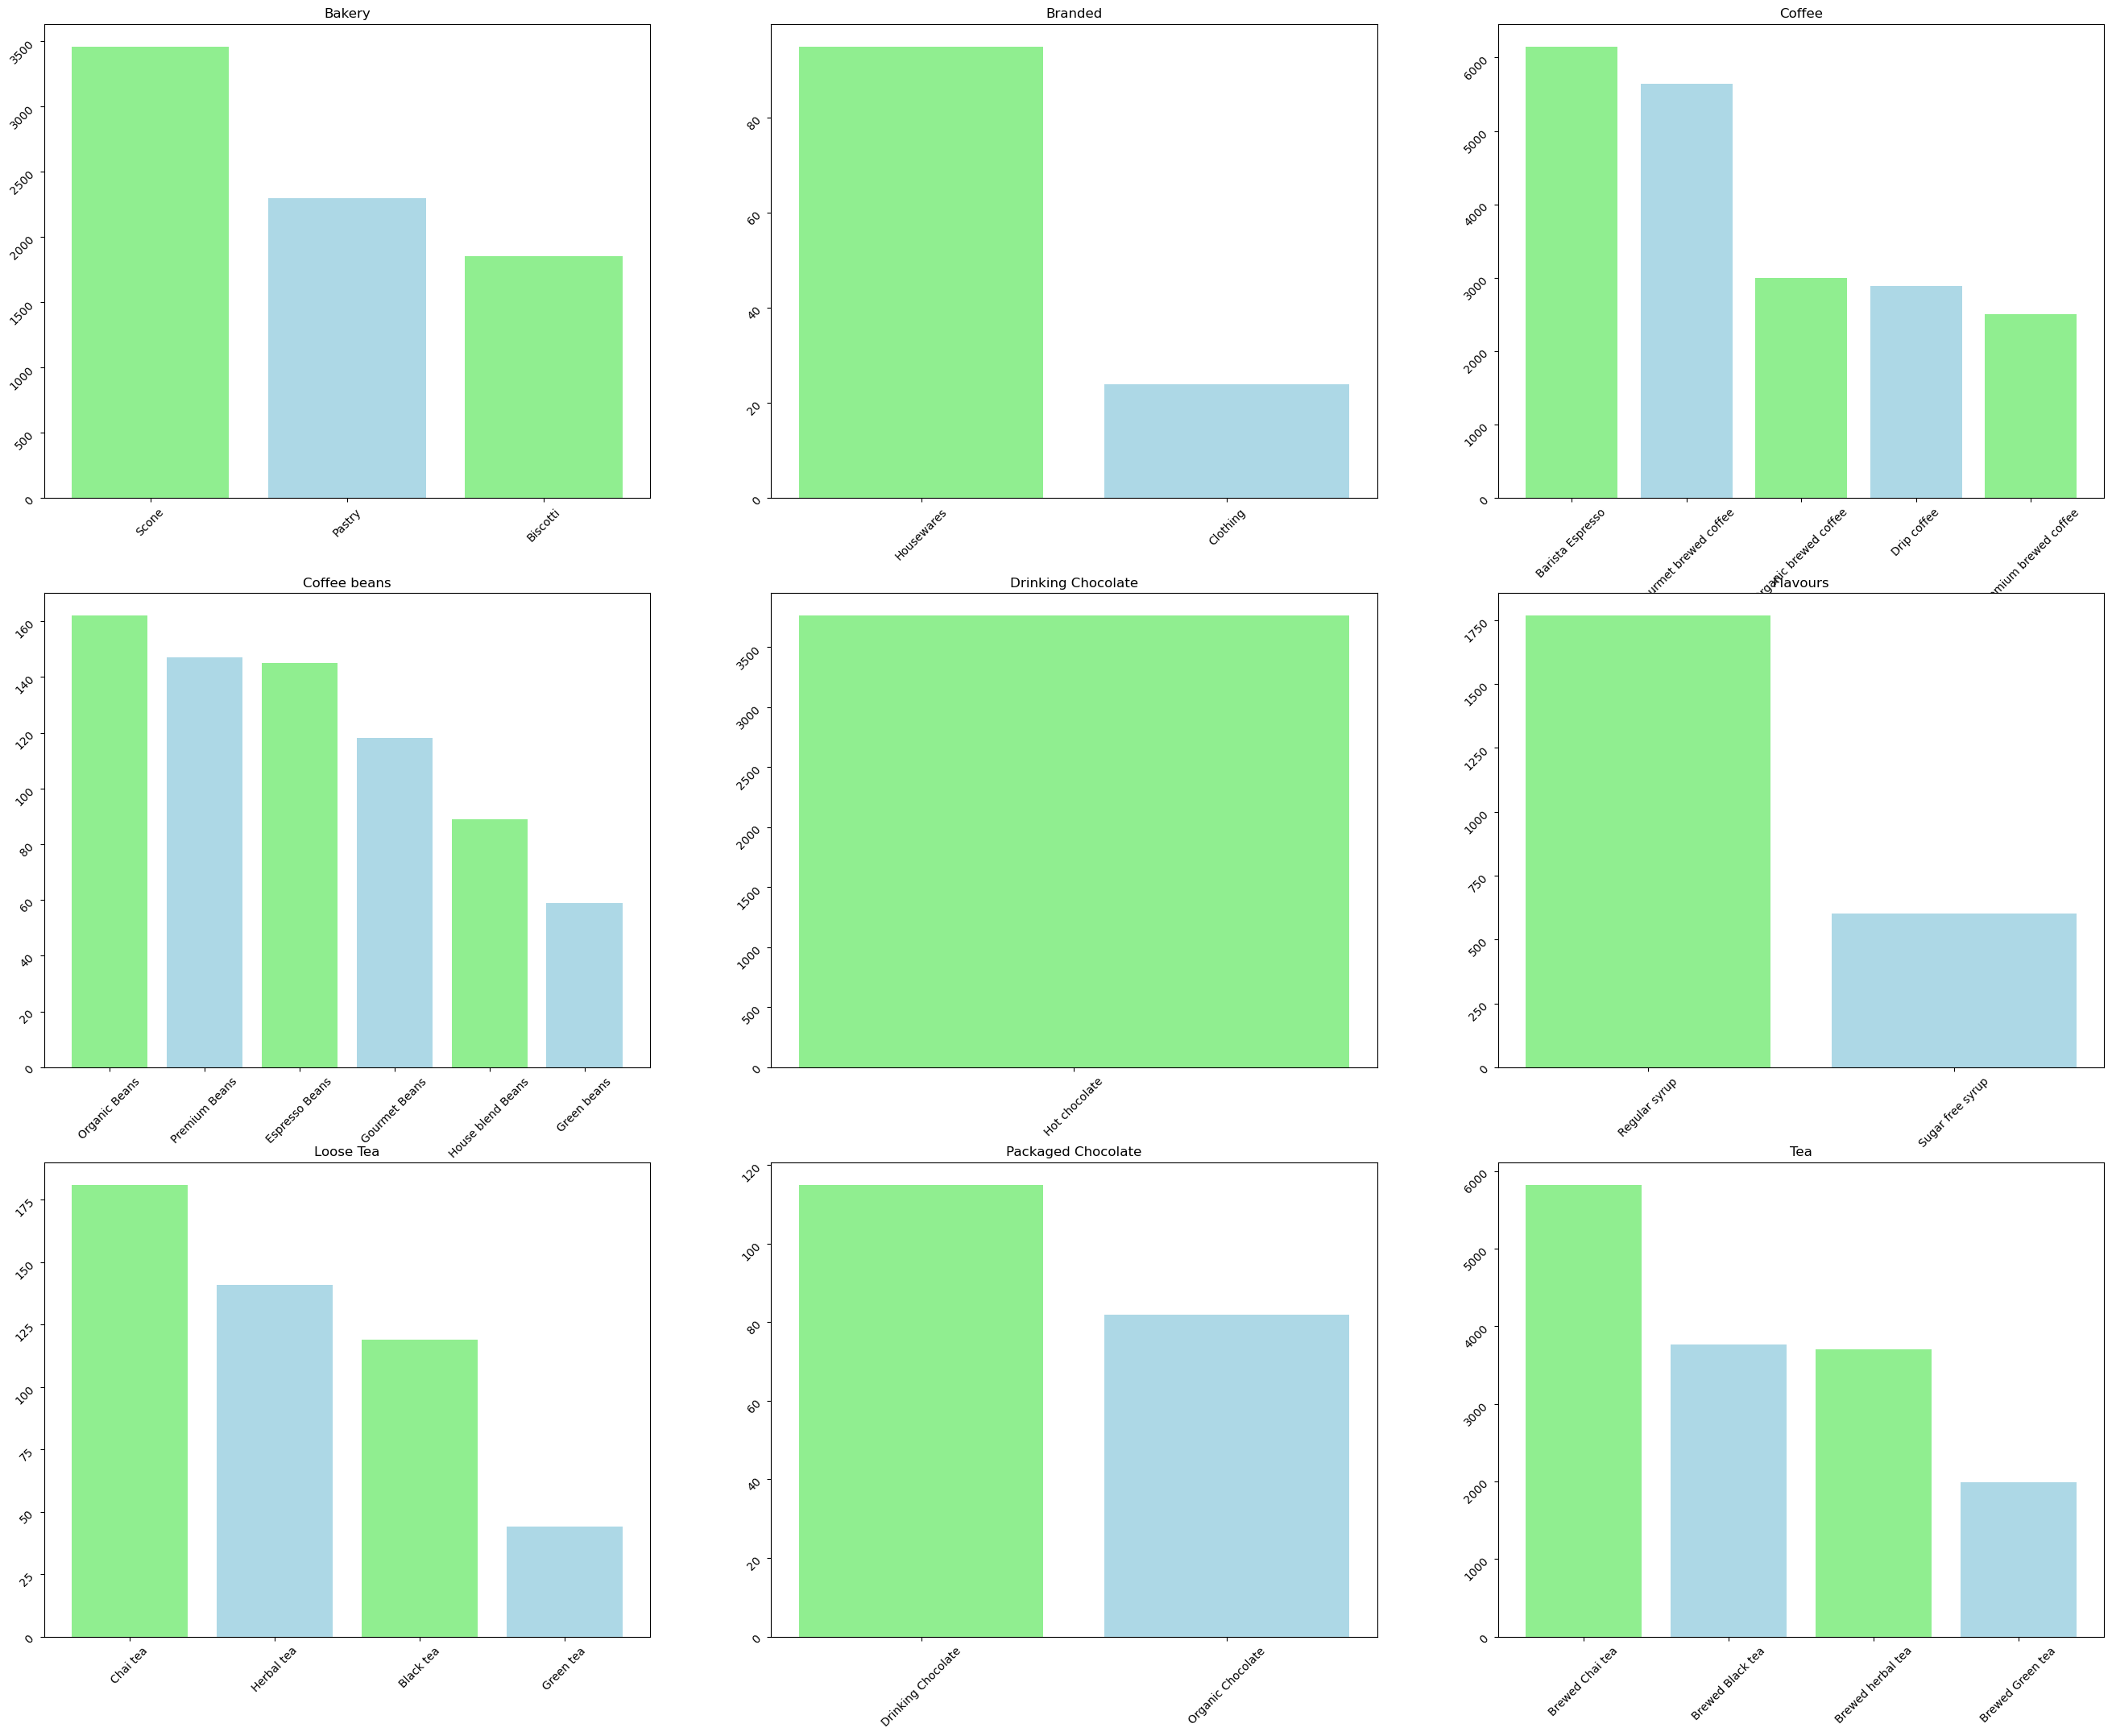

In [1720]:
hk = df[df.store_location == "Hell's Kitchen"]
grouped = hk.groupby('product_category')['product_type'].value_counts()
categories = grouped.unstack().index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(33,26))

axes = axes.flatten()

for i, items in enumerate(categories):
    axes[i].bar(grouped[items].index, grouped[items].values,color=['lightgreen','lightblue'])
    axes[i].tick_params(rotation=45)
    axes[i].set_title(items)

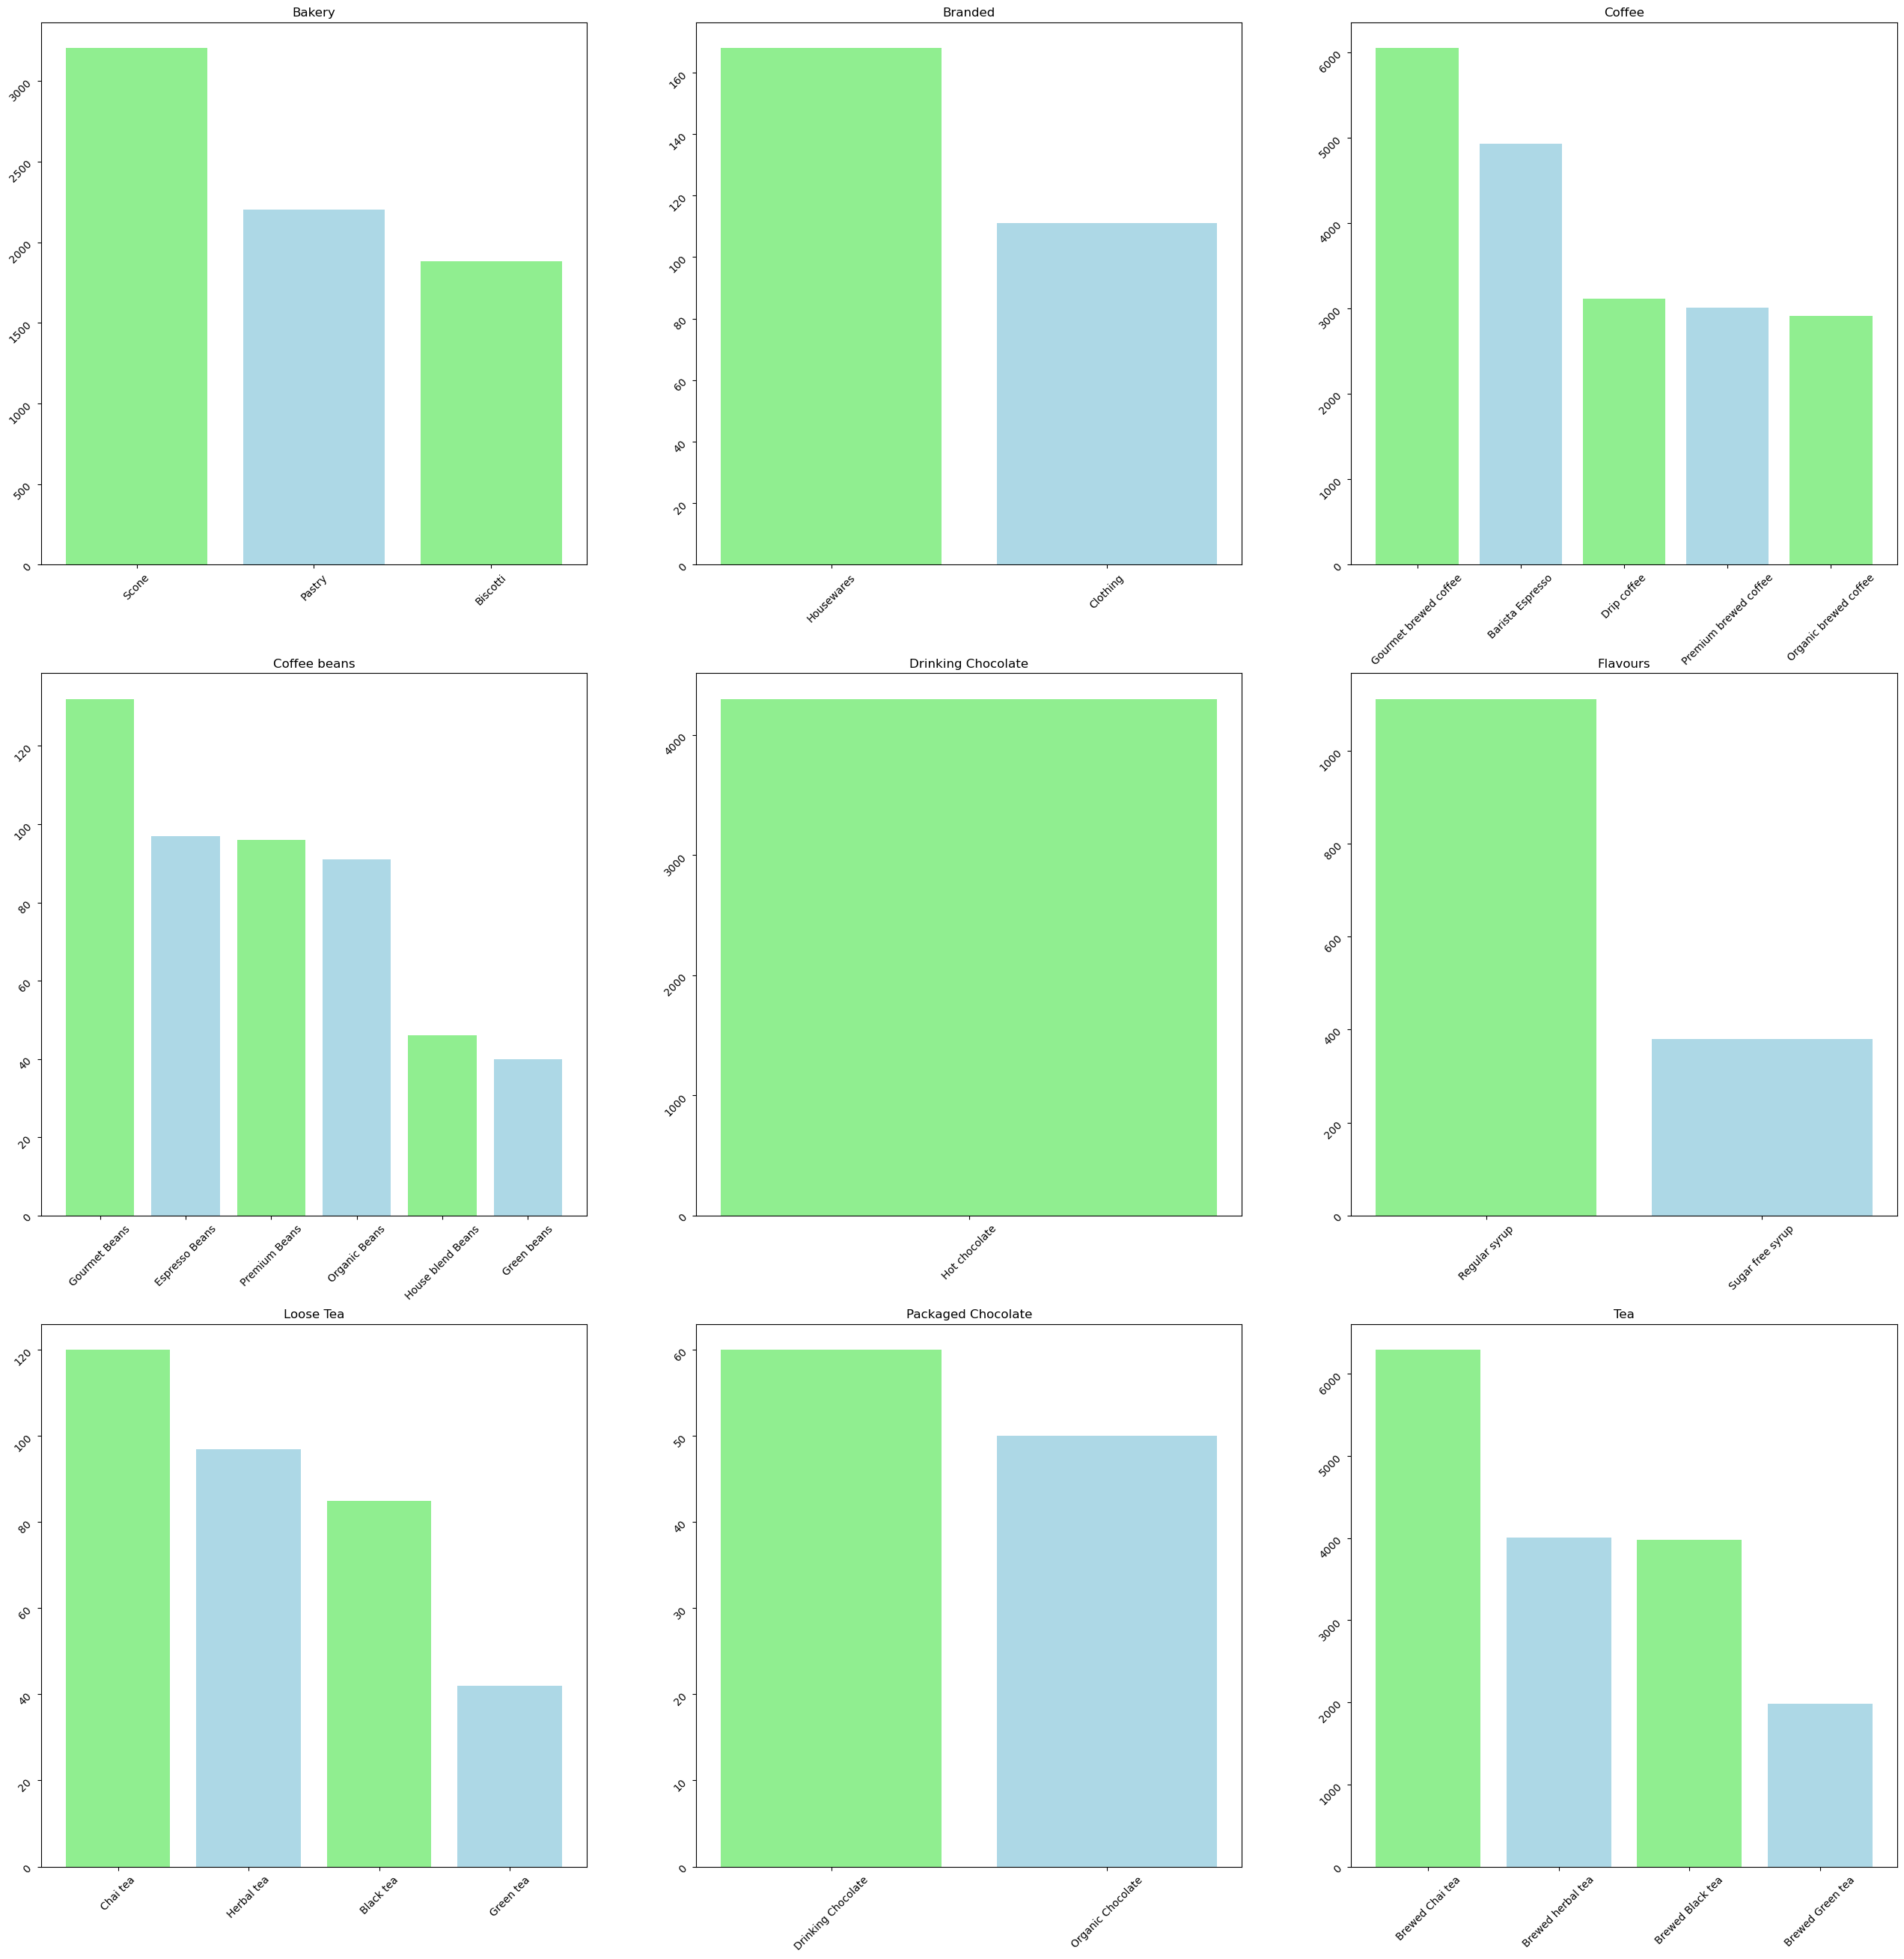

In [1721]:
As = df[df.store_location == 'Astoria']
grouped = As.groupby('product_category')['product_type'].value_counts()
categories = grouped.unstack().index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(32,32))

axes = axes.flatten()

for i, items in enumerate(categories):
    axes[i].bar(grouped[items].index, grouped[items].values,color=['lightgreen','lightblue'])
    axes[i].tick_params(rotation=45)
    axes[i].set_title(items)

## Bakery :
* Lower Manhattan: scone = 3500
                   pastry = 2300
                   biscotti = 2000 

* Hell's Kitchen: scone = 3400
                   pastry = 2300
                   biscotti = 1900

* Astoria : scone = 3300
                   pastry = 2300
                   biscotti = 1800

## 1. Overall Performance Trend

* Scones are the best-selling bakery product in all three locations, with sales significantly higher than pastries and biscotti.
* Pastries consistently hold the second position, while biscotti remain the lowest-selling bakery item across all branches.
* The sales pattern is similar in all locations, indicating consistent customer preferences for bakery items across the city.  



## Branded :
* Lower Manhattan: Housewares = 270
                   Clothing = 80
* Hell's Kitchen: Housewares = 95
                  Clothing = 22
* Astoria : Housewares = 168
                  Clothing = 110

## 1. Overall Performance Trend

* Housewares sell far better than Clothing in all locations except Astoria, where clothing sales are relatively stronger.
* There is a large sales gap between the top-performing location (Lower Manhattan) and the lowest (Hell’s Kitchen).


## Coffee :
* Lower Manhattan: Barista Espressoc = 5400
                   Gourmet brewed coffee = 5300
                   Premium brewed coffee = 2600
                   Organic brewed coffee = 2550
                   Drip coffee = 2500
* Hell's kitchen: Barista Espressoc = 6200
                   Gourmet brewed coffee = 5600
                   Premium brewed coffee = 2600
                   Organic brewed coffee = 2900
                   Drip coffee = 2500
* Astoria : Barista Espressoc = 4900
            Gourmet brewed coffee = 6000
            Premium brewed coffee = 2900
            Organic brewed coffee = 2800
            Drip coffee = 3000
## 1. Product-Wise Performance Across Locations

1. Barista Espresso: Highest in Hell’s Kitchen, lowest in Astoria — may be due to lifestyle differences (fast-paced vs. relaxed).
2. Gourmet Brewed Coffee: Strongest in Astoria — possibly linked to a more leisurely coffee-drinking culture.
3. Premium Brewed Coffee & Organic Brewed Coffee: Sales remain fairly consistent across locations, indicating stable but niche demand.
4. Drip Coffee: Steady across locations but peaks in Astoria, perhaps due to cost or local tradition.

## Coffee Beans :
* Lower Manhattan: Organic Beans : 160
                  Gourmet Beans : 112
                  Premium Beans : 92
                  Espresso Beans : 78
                  House blend Beans : 43
                  Green beans : 30
* Hell's Kitchen: Organic Beans : 162
                 Gourmet Beans : 119
                 Premium Beans : 142
                 Espresso Beans : 141
                 House blend Beans : 90
                 Green beans : 60
* Astoria : Organic Beans : 92
                 Gourmet Beans : 130
                 Premium Beans : 97
                 Espresso Beans : 98
                 House blend Beans : 42
                 Green beans : 38
## 1.Comparative Insights
1. Organic Beans lead overall, but their dominance is weaker in Astoria.
2. Gourmet Beans are strong in Astoria and steady in other locations.
3. Premium & Espresso Beans have notable strength in Hell’s Kitchen, suggesting these areas could benefit from marketing promotions for high-end and strong-flavor coffees.
4. House Blend & Green Beans remain niche products, with Hell’s Kitchen showing the largest niche audience for them.

## 5. Drinking Chocolate
* Lower Manhattan: Hot Chocolate around 3400
* Hell's Kitchen: Hot Chocolate around 3800
* Astoria: Hot Chocolate around 4000

## 1. Overall Insight
1. Astoria store has drinking coffee sales
2. Sales increase progressively from Lower Manhattan → Hell’s Kitchen → Astoria.
3. Could be due to location demographics, climate conditions, or marketing efforts varying by store.

## 6. Flavours 
* Lower Manhattan: Regular syrup = 2150
                   Sugar Free syrup = 850
* Hell's Kitchen: Regular syrup = 1750
                  Sugar Free syrup = 600
* Astoria: Regular Syrup = 1150
           Sugar Free syrup = 370

## 1. Total Sales Across all Locations
1. Regular Syrup = 5050 units
2150+1750+1150 = 5050 units

2. Sugar Free Syrup = 1820 units
 850+600+370 = 1820 units

Observation: Regular syrup sales (5050 units) are ~2.78 times higher than sugar-free syrup (1820 units). This shows a strong preference for regular syrup among customers

## 7. Loose Tea    
* Lower Manhattan = Chai tea = 142
                    Black tea = 100
                    Green tea = 70
                    Herbal tea = 65
* Hell's Kitchen = Chai tea = 180
                   Black tea = 120
                   Green tea = 40
                   Herbal tea = 140
* Astoria  = Chai tea = 120
             Black tea = 85
             Green tea = 40
             Herbal tea = 98
  
## 1. Location-wise Performance
1. Lower Manhattan (Total = 377)
   * Strongest in Chai Tea (142).
   * Weakest in Herbal Tea (65).

2.  Hell’s Kitchen (Total = 480)
   * Best performer overall in Loose Tea sales.
   * Herbal Tea sales (140) are much higher than Lower Manhattan and Astoria.
   * Green Tea is weakest here (40).

3. Astoria (Total = 343)
   * Balanced sales, with Herbal Tea (98) second only to Chai Tea (120).
   * Green Tea matches Hell’s Kitchen’s lowest count (40).

## 8.Packaged Chocolate  
1. Lower Manhattan = Drinking Chocolate = 95 
                     Organic Chocolate = 93
2. Hell's Kitchen = Drinking Chocolate = 115
                     Organic Chocolate = 80
3. Astoria = Drinking Chocolate = 60 
                     Organic Chocolate = 50

## 1. Product-Wise Performance Across Locations
1. Drinking Chocolate = 
* Highest in Hell’s Kitchen (115) → Suggests stronger demand or better marketing there.
* Lowest in Astoria (60).
2. Organic Chocolate
* Highest in Lower Manhattan (93) → Likely due to higher preference for premium/health-oriented products in that market.
* Lowest in Astoria (50).

## 9.Tea    
* Lower Manhattan = Brewed Chai tea = 5000
                    Brewed Black tea = 3500 
                    Brewed herbal tea = 3400
                    Brewed Green tea = 1700
* Hell's Kitchen = Brewed Chai tea = 5800
                    Brewed Black tea = 3800
                    Brewed herbal tea = 3700
                    Brewed Green tea = 2000
* Astoria = Brewed Chai tea = 6400
            Brewed Black tea = 3900
            Brewed herbal tea = 4000
            Brewed Green tea = 2000
  
## 1. Key Observations

1. Best-selling tea type in all locations: Brewed Chai Tea
2. Least-selling tea type in all locations: Brewed Green Tea.
3. Highest total sales by location: Astoria.
4. Lowest total sales by location: Lower Manhattan.

In [1722]:
jan=df[df.Month_name=='January']
jan

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month_name,week_name,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,Sunday,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,Sunday,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,Sunday,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,17339,2023-01-31,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,January,Tuesday,3.00
17310,17340,2023-01-31,19:54:33,1,3,Astoria,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg,January,Tuesday,3.00
17311,17341,2023-01-31,20:00:57,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,January,Tuesday,8.00
17312,17342,2023-01-31,20:00:57,1,8,Hell's Kitchen,71,3.75,Bakery,Pastry,Chocolate Croissant,January,Tuesday,3.75


In [1723]:
jan_grouped= jan.groupby('product_category')['product_type'].value_counts()
jan_grouped

product_category    product_type         
Bakery              Scone                    1202
                    Pastry                    774
                    Biscotti                  667
Branded             Housewares                 60
                    Clothing                   36
Coffee              Gourmet brewed coffee    1981
                    Barista Espresso         1886
                    Organic brewed coffee    1028
                    Drip coffee               953
                    Premium brewed coffee     943
Coffee beans        Organic Beans              51
                    Espresso Beans             45
                    Premium Beans              39
                    Gourmet Beans              34
                    House blend Beans          27
                    Green beans                23
Drinking Chocolate  Hot chocolate            1333
Flavours            Regular syrup             582
                    Sugar free syrup          194
Loose Te

In [1724]:
abcd=df[df.product_category	 == 'Bakery']
abcd

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month_name,week_name,total_sales
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,January,Sunday,3.00
16,17,2023-01-01,07:59:58,1,5,Lower Manhattan,79,3.75,Bakery,Scone,Jumbo Savory Scone,January,Sunday,3.75
22,23,2023-01-01,08:24:26,1,5,Lower Manhattan,69,3.25,Bakery,Biscotti,Hazelnut Biscotti,January,Sunday,3.25
26,27,2023-01-01,08:33:08,1,5,Lower Manhattan,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti,January,Sunday,3.50
28,29,2023-01-01,08:35:03,1,5,Lower Manhattan,71,3.75,Bakery,Pastry,Chocolate Croissant,January,Sunday,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149063,149404,2023-06-30,18:49:29,1,3,Astoria,79,3.75,Bakery,Scone,Jumbo Savory Scone,June,Friday,3.75
149093,149434,2023-06-30,19:39:19,1,8,Hell's Kitchen,72,3.25,Bakery,Scone,Ginger Scone,June,Friday,3.25
149096,149437,2023-06-30,19:44:46,2,3,Astoria,72,3.25,Bakery,Scone,Ginger Scone,June,Friday,6.50
149101,149442,2023-06-30,19:46:28,1,8,Hell's Kitchen,75,3.50,Bakery,Pastry,Croissant,June,Friday,3.50


In [1725]:
x=df.groupby(["transaction_date","product_category"]).size().reset_index(name='count')
x

,transaction_date,product_category,count
0,2023-01-01,Bakery,68
1,2023-01-01,Coffee,241
2,2023-01-01,Drinking Chocolate,50
3,2023-01-01,Tea,191
4,2023-01-02,Bakery,87
...,...,...,...
1368,2023-06-30,Drinking Chocolate,74
1369,2023-06-30,Flavours,76
1370,2023-06-30,Loose Tea,9
1371,2023-06-30,Packaged Chocolate,8


In [1726]:
x=df.groupby(["transaction_date","product_category"]).size().reset_index(name='count')
x

,transaction_date,product_category,count
0,2023-01-01,Bakery,68
1,2023-01-01,Coffee,241
2,2023-01-01,Drinking Chocolate,50
3,2023-01-01,Tea,191
4,2023-01-02,Bakery,87
...,...,...,...
1368,2023-06-30,Drinking Chocolate,74
1369,2023-06-30,Flavours,76
1370,2023-06-30,Loose Tea,9
1371,2023-06-30,Packaged Chocolate,8


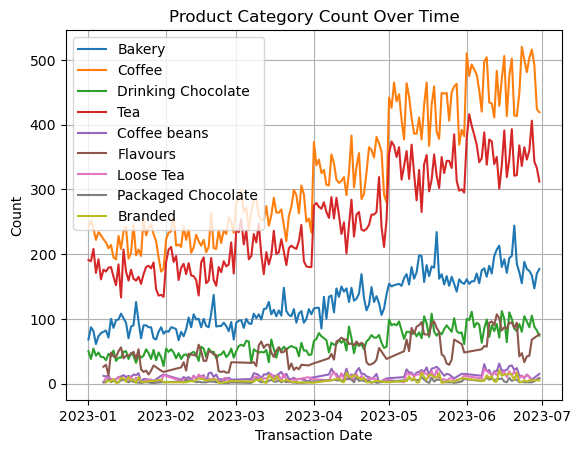

In [1727]:
plt.figure
for category in x['product_category'].unique():
     subset = x[x['product_category'] == category]
     plt.plot(subset['transaction_date'],subset['count'], label=category)

plt.xlabel("Transaction Date")
plt.ylabel("Count")
plt.title("Product Category Count Over Time") 
plt.legend()
plt.grid(True)
plt.show()


Tea and Coffee drive the highest sales, while Bakery items serve as supportive products.

## KPIs:

## Sales Trends

* Total Sales Revenue

In [1728]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month_name,week_name,total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,Sunday,6.00
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,Sunday,9.00
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,Sunday,2.00
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,Sunday,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,June,Friday,5.00
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,June,Friday,6.00
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,June,Friday,3.00
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,June,Friday,3.75


In [1729]:
df.total_sales.sum()

698812.3300000002

* Number of Transactions

In [1730]:
num_transactions = df['transaction_id'].nunique()
print("Total Number of Transactions:", num_transactions)

Total Number of Transactions: 149116


* Average Transaction Value (sales/transactions)


In [1731]:
df.total_sales.sum()/df['transaction_id'].nunique()

4.686367190643527

* Average Items per transaction (qty)

In [1732]:
df.transaction_qty.mean()

1.438276241315486

## Module 1: Sales Trends over Time


* Line/bar chart daily/weekly/monthly transactions


In [1733]:
mn=df.groupby(df["transaction_date"].dt.to_period("M")).size()
mn

transaction_date
2023-01    17314
2023-02    16359
2023-03    21229
2023-04    25335
2023-05    33527
2023-06    35352
Freq: M, dtype: int64

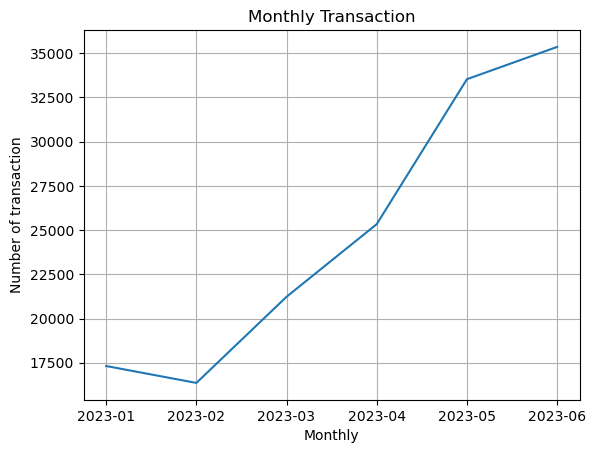

In [1734]:
plt.plot(mn.index.astype(str),mn.values)
plt.title("Monthly Transaction")
plt.xlabel("Monthly")
plt.ylabel("Number of transaction")
plt.grid(True)
plt.show()

In [1735]:
at=df.groupby(df["transaction_date"].dt.to_period("W")).size()
at

transaction_date
2022-12-26/2023-01-01     550
2023-01-02/2023-01-08    3825
2023-01-09/2023-01-15    4113
2023-01-16/2023-01-22    4029
2023-01-23/2023-01-29    3854
2023-01-30/2023-02-05    3761
2023-02-06/2023-02-12    4005
2023-02-13/2023-02-19    4263
2023-02-20/2023-02-26    4099
2023-02-27/2023-03-05    4517
2023-03-06/2023-03-12    4786
2023-03-13/2023-03-19    5049
2023-03-20/2023-03-26    4825
2023-03-27/2023-04-02    4858
2023-04-03/2023-04-09    5703
2023-04-10/2023-04-16    6205
2023-04-17/2023-04-23    5942
2023-04-24/2023-04-30    5853
2023-05-01/2023-05-07    7224
2023-05-08/2023-05-14    7769
2023-05-15/2023-05-21    8014
2023-05-22/2023-05-28    7610
2023-05-29/2023-06-04    7477
2023-06-05/2023-06-11    8145
2023-06-12/2023-06-18    8594
2023-06-19/2023-06-25    8400
2023-06-26/2023-07-02    5646
Freq: W-SUN, dtype: int64

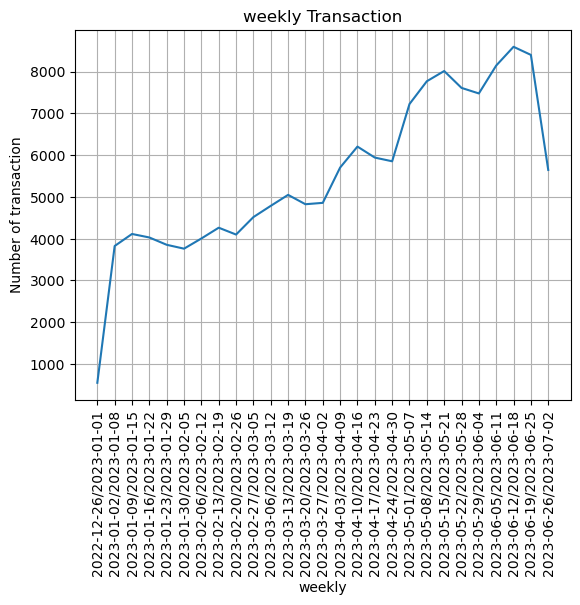

In [1736]:
plt.plot(at.index.astype(str),at.values)
plt.title("weekly Transaction")
plt.xlabel("weekly")
plt.ylabel("Number of transaction")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [1737]:
dm=df.groupby(df["transaction_date"].dt.to_period("D")).size()
dm

transaction_date
2023-01-01     550
2023-01-02     566
2023-01-03     582
2023-01-04     497
2023-01-05     547
              ... 
2023-06-26    1195
2023-06-27    1277
2023-06-28    1070
2023-06-29    1009
2023-06-30    1095
Freq: D, Length: 181, dtype: int64

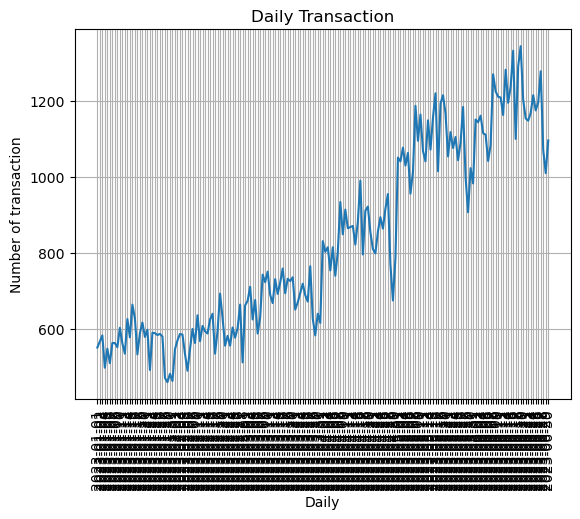

In [1738]:
plt.plot(dm.index.astype(str),dm.values)
plt.title("Daily Transaction")
plt.xlabel("Daily")
plt.ylabel("Number of transaction")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

* Line/bar chart daily/weekly/monthly sales revenue


In [1739]:
ap = df.groupby(df["transaction_date"].dt.to_period("M"))["total_sales"].sum()
ap


transaction_date
2023-01     81677.74
2023-02     76145.19
2023-03     98834.68
2023-04    118941.08
2023-05    156727.76
2023-06    166485.88
Freq: M, Name: total_sales, dtype: float64

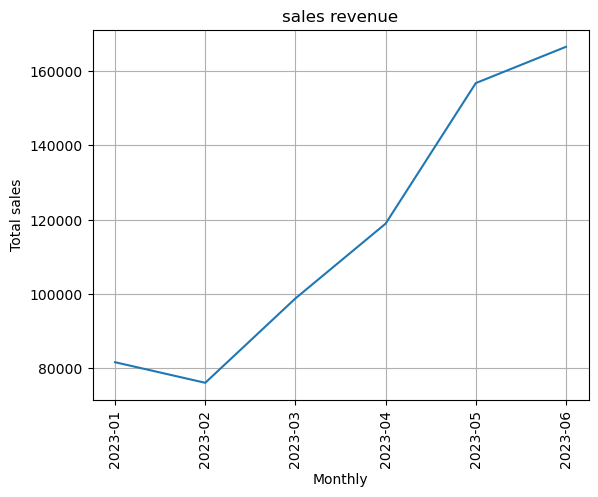

In [1740]:
plt.plot(ap.index.astype(str),ap.values)
plt.title("sales revenue")
plt.xlabel("Monthly")
plt.ylabel("Total sales")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [1741]:
ak = df.groupby(df["transaction_date"].dt.to_period("W"))["total_sales"].sum()
ak

transaction_date
2022-12-26/2023-01-01     2508.20
2023-01-02/2023-01-08    17139.33
2023-01-09/2023-01-15    19129.53
2023-01-16/2023-01-22    19818.51
2023-01-23/2023-01-29    18271.63
2023-01-30/2023-02-05    17231.59
2023-02-06/2023-02-12    18333.35
2023-02-13/2023-02-19    19856.62
2023-02-20/2023-02-26    20063.07
2023-02-27/2023-03-05    20389.75
2023-03-06/2023-03-12    22146.34
2023-03-13/2023-03-19    23594.59
2023-03-20/2023-03-26    23395.30
2023-03-27/2023-04-02    22055.55
2023-04-03/2023-04-09    26079.89
2023-04-10/2023-04-16    28981.30
2023-04-17/2023-04-23    29217.51
2023-04-24/2023-04-30    27386.63
2023-05-01/2023-05-07    32110.10
2023-05-08/2023-05-14    36056.88
2023-05-15/2023-05-21    38476.55
2023-05-22/2023-05-28    36605.12
2023-05-29/2023-06-04    33914.41
2023-06-05/2023-06-11    37457.26
2023-06-12/2023-06-18    41315.94
2023-06-19/2023-06-25    40764.86
2023-06-26/2023-07-02    26512.52
Freq: W-SUN, Name: total_sales, dtype: float64

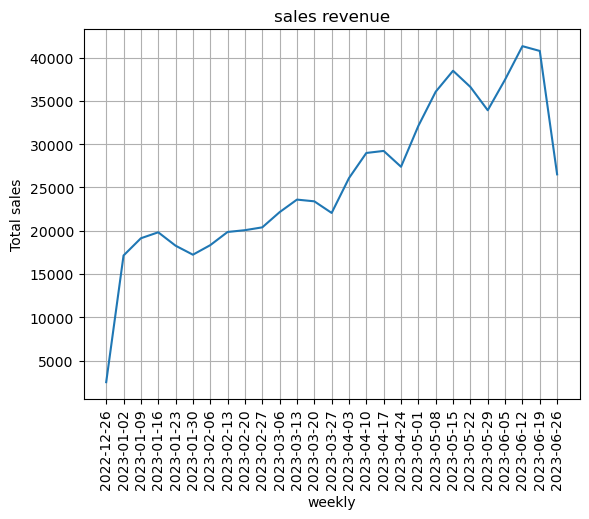

In [1742]:
plt.plot(ak.index.start_time.astype(str),ak.values)
plt.title("sales revenue")
plt.xlabel("weekly")
plt.ylabel("Total sales")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [1743]:
gb = df.groupby(df["transaction_date"].dt.to_period("D"))["total_sales"].sum()
gb

transaction_date
2023-01-01    2508.20
2023-01-02    2403.35
2023-01-03    2565.00
2023-01-04    2220.10
2023-01-05    2418.85
               ...   
2023-06-26    5875.90
2023-06-27    5975.65
2023-06-28    4728.90
2023-06-29    4450.75
2023-06-30    5481.32
Freq: D, Name: total_sales, Length: 181, dtype: float64

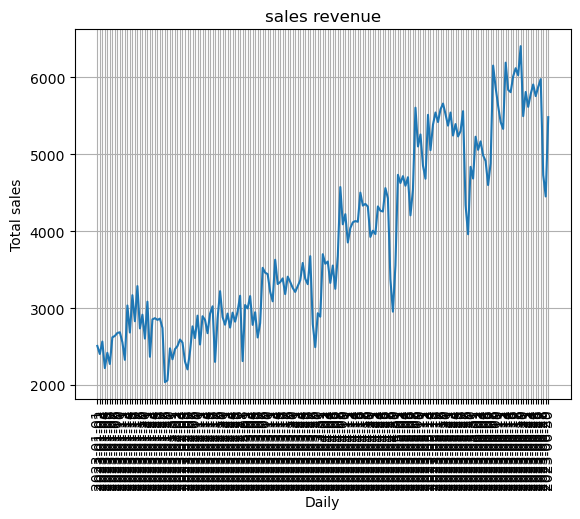

In [1744]:
plt.plot(gb.index.astype(str),gb.values)
plt.title("sales revenue")
plt.xlabel("Daily")
plt.ylabel("Total sales")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## * Moving Average (7-day / 4 week) (for transactions and sales)

In [1745]:
# daily moving average


sales = df.groupby(df.transaction_date.dt.to_period('W'))['total_sales'].sum()
mov_avg = sales.rolling(window=2).mean()

In [1746]:
mov_avg

transaction_date
2022-12-26/2023-01-01          NaN
2023-01-02/2023-01-08     9823.765
2023-01-09/2023-01-15    18134.430
2023-01-16/2023-01-22    19474.020
2023-01-23/2023-01-29    19045.070
2023-01-30/2023-02-05    17751.610
2023-02-06/2023-02-12    17782.470
2023-02-13/2023-02-19    19094.985
2023-02-20/2023-02-26    19959.845
2023-02-27/2023-03-05    20226.410
2023-03-06/2023-03-12    21268.045
2023-03-13/2023-03-19    22870.465
2023-03-20/2023-03-26    23494.945
2023-03-27/2023-04-02    22725.425
2023-04-03/2023-04-09    24067.720
2023-04-10/2023-04-16    27530.595
2023-04-17/2023-04-23    29099.405
2023-04-24/2023-04-30    28302.070
2023-05-01/2023-05-07    29748.365
2023-05-08/2023-05-14    34083.490
2023-05-15/2023-05-21    37266.715
2023-05-22/2023-05-28    37540.835
2023-05-29/2023-06-04    35259.765
2023-06-05/2023-06-11    35685.835
2023-06-12/2023-06-18    39386.600
2023-06-19/2023-06-25    41040.400
2023-06-26/2023-07-02    33638.690
Freq: W-SUN, Name: total_sales, dtype:

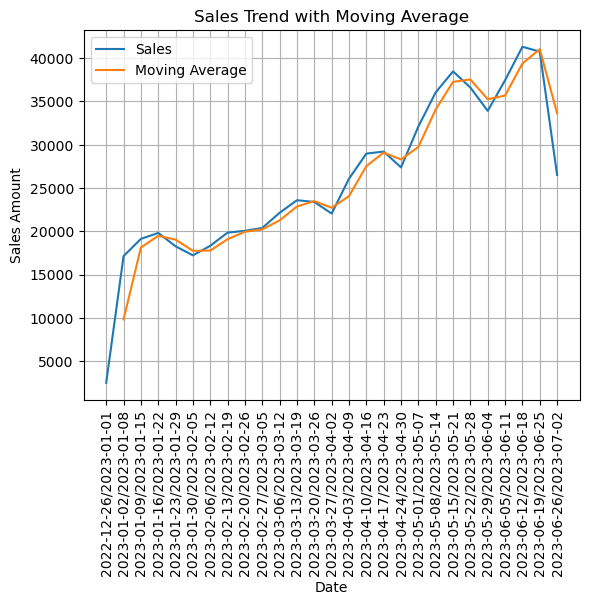

In [1747]:
plt.plot(sales.index.astype(str), sales.values, label="Sales")
plt.plot(mov_avg.index.astype(str), mov_avg.values, label="Moving Average")
plt.title("Sales Trend with Moving Average") 
plt.xlabel("Date")                             
plt.ylabel("Sales Amount")                     
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

## * Month-over-Month growth rates (for transactions and sales)

In [1748]:
sales = df.groupby(df.transaction_date.dt.to_period('M'))['total_sales'].sum()
daily_growth = sales.pct_change() * 100
daily_growth

transaction_date
2023-01          NaN
2023-02    -6.773633
2023-03    29.797667
2023-04    20.343466
2023-05    31.769242
2023-06     6.226159
Freq: M, Name: total_sales, dtype: float64

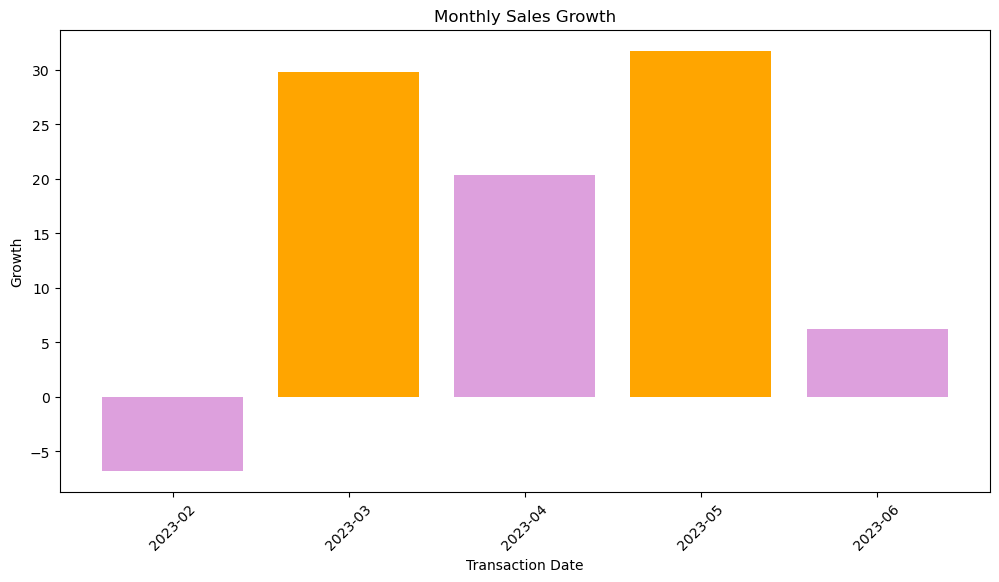

In [1817]:
plt.figure(figsize=(12,6))
plt.bar(daily_growth.index.astype('str'), daily_growth.values,color=['orange','plum'])
plt.title("Monthly Sales Growth")
plt.xlabel("Transaction Date")
plt.ylabel("Growth")
plt.xticks(rotation=45)
plt.show()


## Module 3: Store Performance

* Total Revenue


In [1750]:
lm.total_sales.sum()

230057.25

In [1751]:
hk.total_sales.sum()

236511.16999999998

In [1752]:
As.total_sales.sum()

232243.91000000003

* Number of Transactions


In [1753]:
lm['transaction_id'].nunique()



47782

In [1754]:
hk['transaction_id'].nunique()

50735

In [1755]:
As['transaction_id'].nunique()

50599

* Average Transaction Value


In [1756]:
lm.total_sales.sum()/df['transaction_id'].nunique()

1.5428072775557284

In [1757]:
hk.total_sales.sum()/df['transaction_id'].nunique()

1.5860884814506826

In [1758]:
As.total_sales.sum()/df['transaction_id'].nunique()

1.557471431637115

* Average Items Per Transaction


In [1759]:
lm.transaction_qty.mean()

1.5014440584320456

In [1760]:
hk.transaction_qty.mean()

1.4139548635064552

In [1761]:
As.transaction_qty.mean()

1.4030119172315658

# Visualizations:

* Store Rankings (Horizontal Bar chart)


In [1762]:
store_ranking = df.groupby("store_location")["total_sales"].sum().sort_values()
store_ranking

store_location
Lower Manhattan    230057.25
Astoria            232243.91
Hell's Kitchen     236511.17
Name: total_sales, dtype: float64

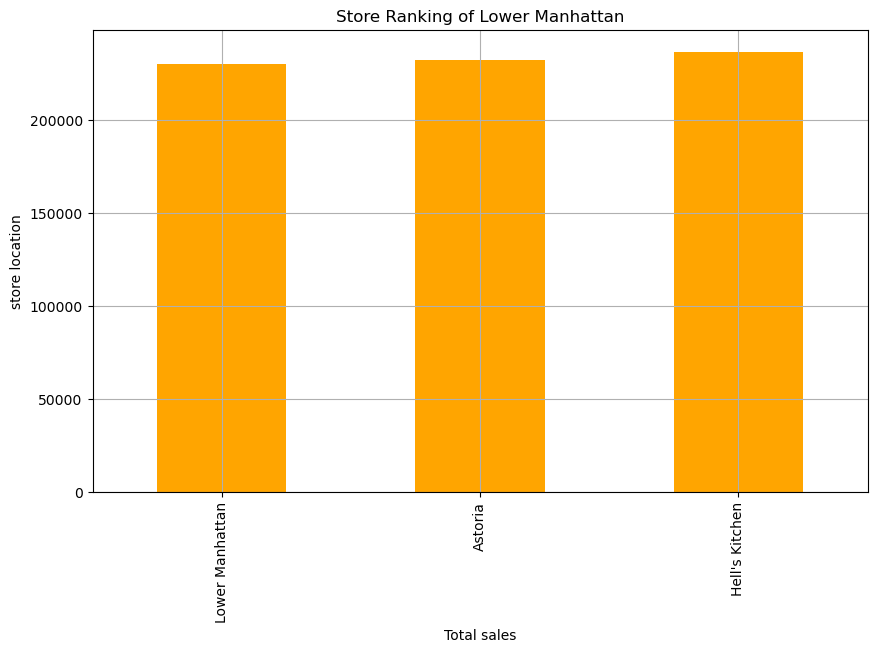

In [1763]:
plt.figure(figsize=(10,6))
store_ranking.plot(kind="bar",color=['orange'])
plt.title("Store Ranking of Lower Manhattan")
plt.xlabel("Total sales")
plt.ylabel("store location")
plt.grid()
plt.show()

In [1764]:
lm_store=lm.groupby(lm["transaction_date"].dt.to_period("W"))["total_sales"].sum()

In [1765]:
hk_store=hk.groupby(hk["transaction_date"].dt.to_period("W"))["total_sales"].sum()

In [1766]:
As_store=As.groupby(As["transaction_date"].dt.to_period("W"))["total_sales"].sum()

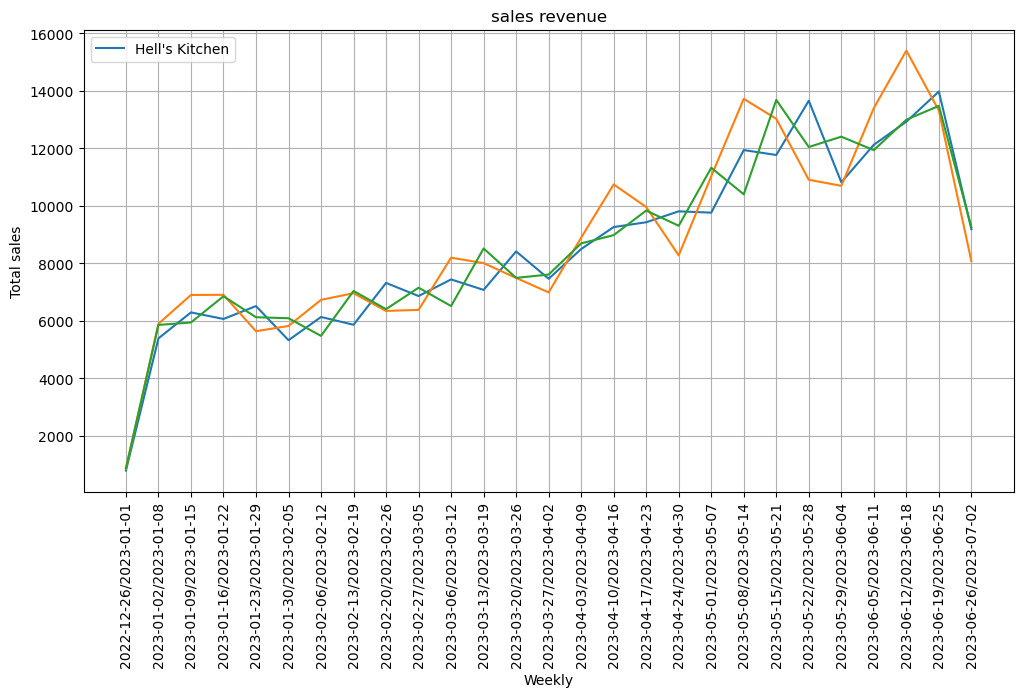

In [1767]:
plt.figure(figsize=(12,6))
plt.plot(lm_store.index.astype(str),lm_store.values, label="Hell's Kitchen")
plt.plot(hk_store.index.astype(str),hk_store.values)
plt.plot(As_store.index.astype(str),As_store.values)
plt.title("sales revenue")
plt.xlabel("Weekly")
plt.ylabel("Total sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [1768]:
lmstore=lm.groupby(lm["transaction_date"].dt.to_period("M"))["total_sales"].sum()

In [1769]:
hkstore=hk.groupby(hk["transaction_date"].dt.to_period("M"))["total_sales"].sum()

In [1770]:
Asstore=As.groupby(As["transaction_date"].dt.to_period("M"))["total_sales"].sum()

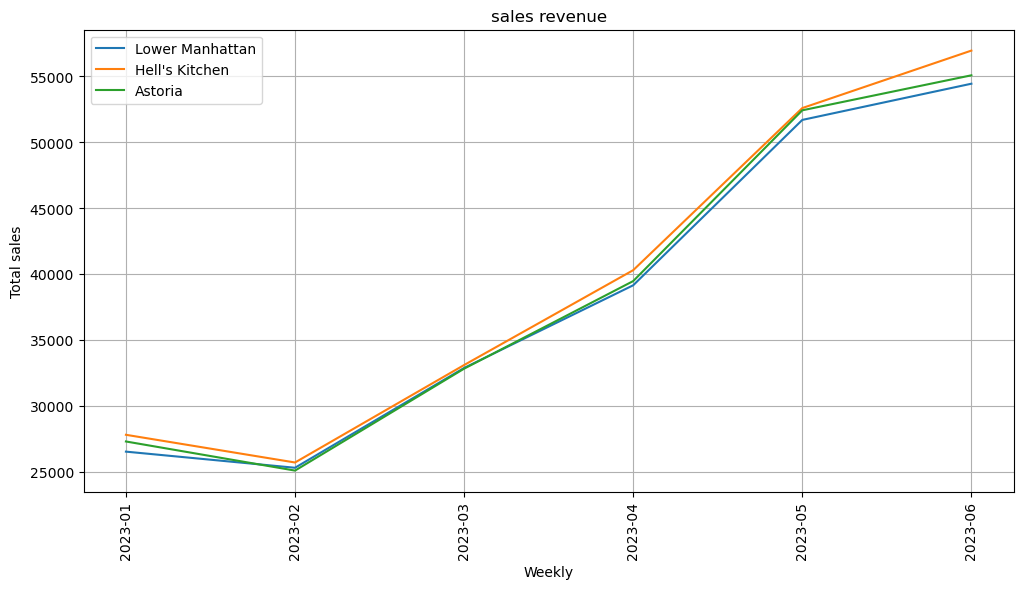

In [1771]:
plt.figure(figsize=(12,6))
plt.plot(lmstore.index.astype(str),lmstore.values, label="Lower Manhattan")
plt.plot(hkstore.index.astype(str),hkstore.values, label="Hell's Kitchen")
plt.plot(Asstore.index.astype(str),Asstore.values, label="Astoria")
plt.title("sales revenue")
plt.xlabel("Weekly")
plt.ylabel("Total sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## Insights: Top Performing Store & Low Performing Store

Hell’s Kitchen (Best Performer): Strongest overall sales.

Astoria (Moderate Performer): Average performance.

Lower Manhattan (Lowest Performer): Weakest revenue.

## * Growth Trends: Month-on-Month Growth

In [1772]:
sales = lm.groupby(lm.transaction_date.dt.to_period('M'))['total_sales'].sum()
monthly_growth = sales.pct_change() * 100
monthly_growth

transaction_date
2023-01          NaN
2023-02    -4.608975
2023-03    29.891845
2023-04    19.066287
2023-05    32.024910
2023-06     5.310670
Freq: M, Name: total_sales, dtype: float64

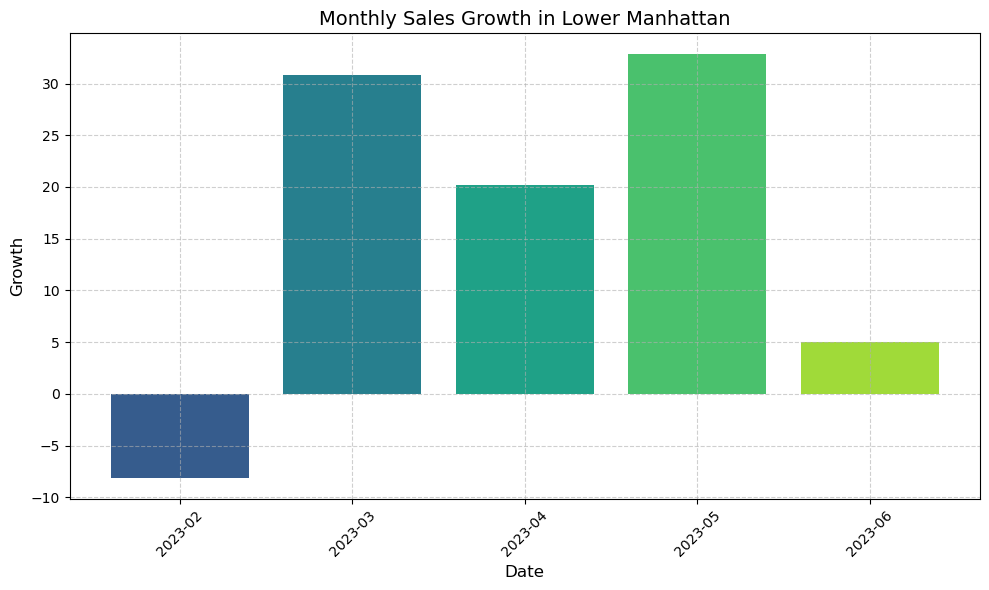

In [1818]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("viridis", len(monthly_growth))

plt.figure(figsize=(10, 6))
plt.bar(monthly_growth.index.astype(str), monthly_growth.values, color=colors)
plt.title("Monthly Sales Growth in Lower Manhattan", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Growth", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [1819]:
sales = hk.groupby(hk.transaction_date.dt.to_period('M'))['total_sales'].sum()
monthly_growth = sales.pct_change() * 100
monthly_growth

transaction_date
2023-01          NaN
2023-02    -7.551405
2023-03    28.735721
2023-04    21.725902
2023-05    30.505030
2023-06     8.285625
Freq: M, Name: total_sales, dtype: float64

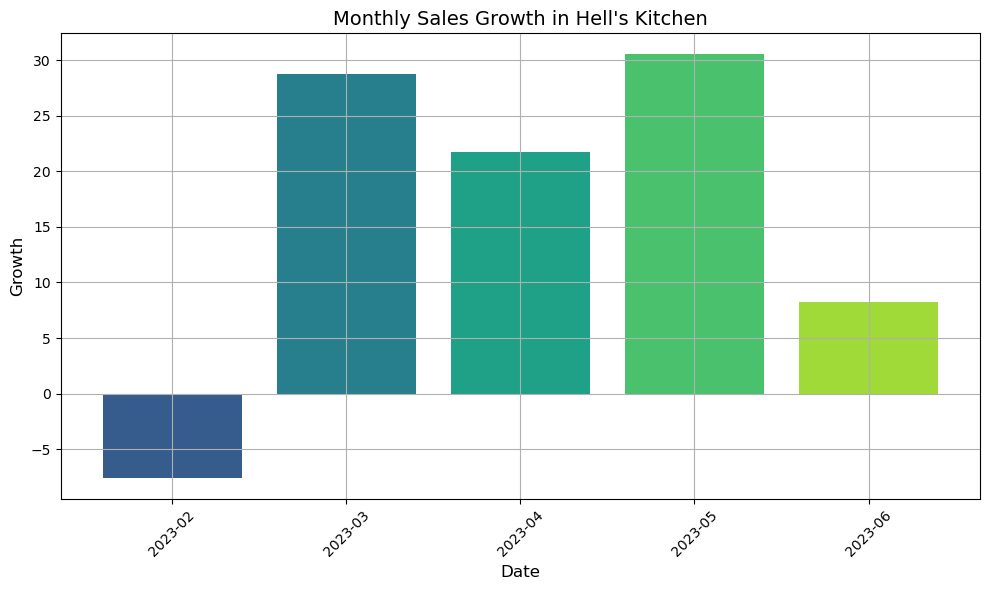

In [1820]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("viridis", len(monthly_growth))

plt.figure(figsize=(10,6))
plt.bar(monthly_growth.index.astype(str), monthly_growth.values,color=colors)
plt.title("Monthly Sales Growth in Hell's Kitchen", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Growth", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1776]:
sales = As.groupby(As.transaction_date.dt.to_period('M'))['total_sales'].sum()
monthly_growth = sales.pct_change() * 100
monthly_growth

transaction_date
2023-01          NaN
2023-02    -8.085039
2023-03    30.790621
2023-04    20.228698
2023-05    32.806317
2023-06     5.062775
Freq: M, Name: total_sales, dtype: float64

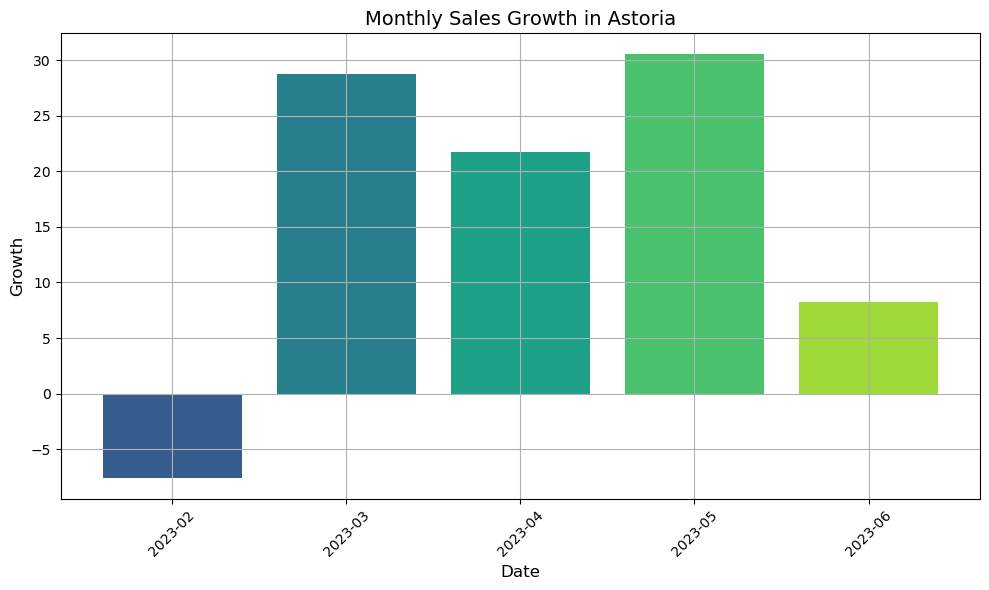

In [1821]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("viridis", len(monthly_growth))

plt.figure(figsize=(10,6))
plt.bar(monthly_growth.index.astype(str), monthly_growth.values,color=colors)
plt.title("Monthly Sales Growth in Astoria", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Growth", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Module 4: Top-Selling Products

* Product Category Distribution (by Sales)

In [1778]:
category_sales = df.groupby('product_category')['total_sales'].sum().reset_index()
category_sales

,product_category,total_sales
0,Bakery,82315.64
1,Branded,13607.00
2,Coffee,269952.45
3,Coffee beans,40085.25
4,Drinking Chocolate,72416.00
5,Flavours,8408.80
6,Loose Tea,11213.60
7,Packaged Chocolate,4407.64
8,Tea,196405.95


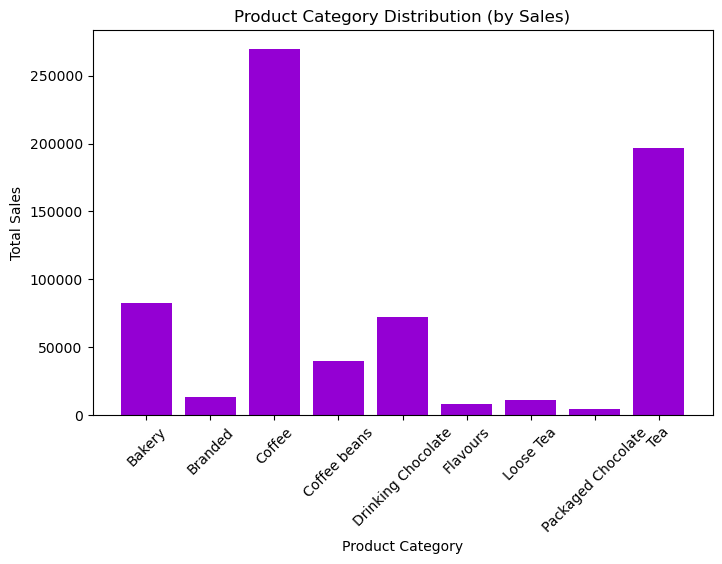

In [1779]:
plt.figure(figsize=(8,5))
plt.bar(category_sales['product_category'], category_sales['total_sales'],color=['darkviolet'])
plt.title("Product Category Distribution (by Sales)")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

* Product Category Distribution (by Sold Quantities

In [1780]:
category_sales2 = df.groupby('product_category')['transaction_qty'].sum().reset_index()
category_sales2

,product_category,transaction_qty
0,Bakery,23214
1,Branded,776
2,Coffee,89250
3,Coffee beans,1828
4,Drinking Chocolate,17457
5,Flavours,10511
6,Loose Tea,1210
7,Packaged Chocolate,487
8,Tea,69737


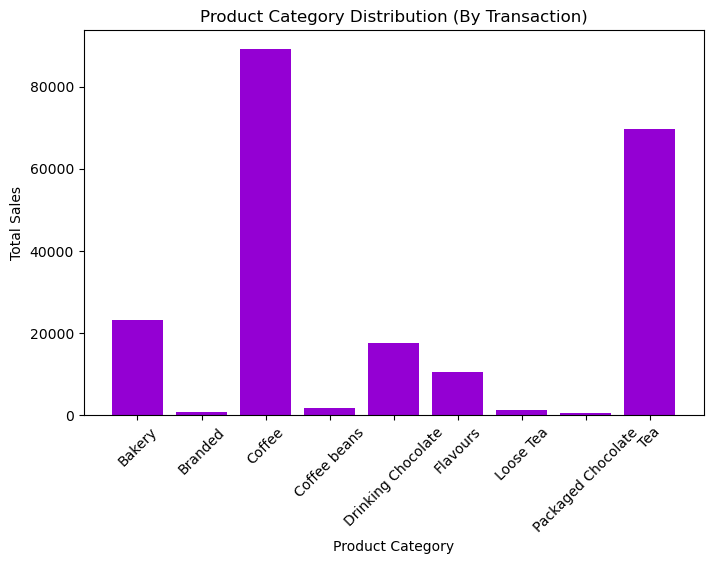

In [1823]:
plt.figure(figsize=(8,5))
plt.bar(category_sales2['product_category'], category_sales2['transaction_qty'],color=['darkviolet'])
plt.title("Product Category Distribution (By Transaction)")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

* Product Category wise Sales Distribution

In [1806]:
category_sales3 = df.groupby(['product_category','product_type'])['total_sales'].sum()
category_sales3

product_category    product_type         
Bakery              Biscotti                 19793.53
                    Pastry                   25655.99
                    Scone                    36866.12
Branded             Clothing                  6163.00
                    Housewares                7444.00
Coffee              Barista Espresso         91406.20
                    Drip coffee              31984.00
                    Gourmet brewed coffee    70034.60
                    Organic brewed coffee    37746.50
                    Premium brewed coffee    38781.15
Coffee beans        Espresso Beans            5560.25
                    Gourmet Beans             6798.00
                    Green beans               1340.00
                    House blend Beans         3294.00
                    Organic Beans             8509.50
                    Premium Beans            14583.50
Drinking Chocolate  Hot chocolate            72416.00
Flavours            Regular syrup       

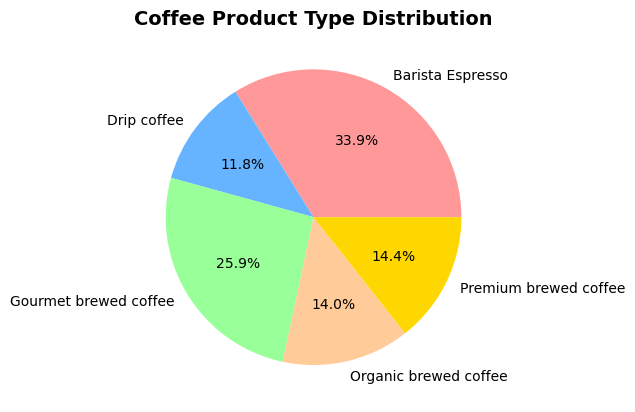

In [1814]:
plt.pie(
    category_sales3['Coffee'].values,
    labels=category_sales3['Coffee'].index.astype(str).tolist(),
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # custom colors
)
plt.title("Coffee Product Type Distribution", fontsize=14, fontweight="bold")
plt.show()


In [1802]:
category_sales4 = df.groupby(['product_category','product_type'])['total_sales'].sum()
category_sales4

product_category    product_type         
Bakery              Biscotti                 19793.53
                    Pastry                   25655.99
                    Scone                    36866.12
Branded             Clothing                  6163.00
                    Housewares                7444.00
Coffee              Barista Espresso         91406.20
                    Drip coffee              31984.00
                    Gourmet brewed coffee    70034.60
                    Organic brewed coffee    37746.50
                    Premium brewed coffee    38781.15
Coffee beans        Espresso Beans            5560.25
                    Gourmet Beans             6798.00
                    Green beans               1340.00
                    House blend Beans         3294.00
                    Organic Beans             8509.50
                    Premium Beans            14583.50
Drinking Chocolate  Hot chocolate            72416.00
Flavours            Regular syrup       

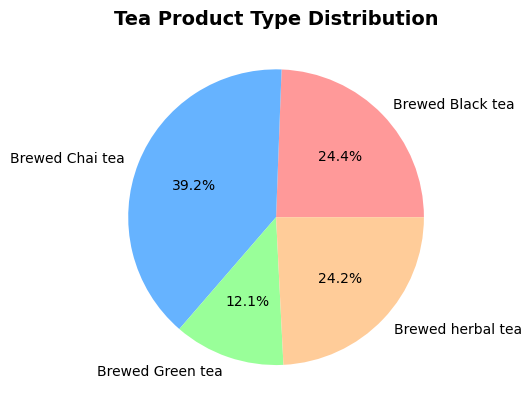

In [1813]:
plt.pie(category_sales4['Tea'].values,
        labels=category_sales4['Tea'].index.astype(str).tolist(),
       autopct='%1.1f%%',
        colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # custom colors
)
plt.title("Tea Product Type Distribution", fontsize=14, fontweight="bold")
plt.show()

* Product Category wise Quantities Sold


In [1804]:
category_sales5 = df.groupby(['product_category','product_type'])['total_sales'].sum()
category_sales5

product_category    product_type         
Bakery              Biscotti                 19793.53
                    Pastry                   25655.99
                    Scone                    36866.12
Branded             Clothing                  6163.00
                    Housewares                7444.00
Coffee              Barista Espresso         91406.20
                    Drip coffee              31984.00
                    Gourmet brewed coffee    70034.60
                    Organic brewed coffee    37746.50
                    Premium brewed coffee    38781.15
Coffee beans        Espresso Beans            5560.25
                    Gourmet Beans             6798.00
                    Green beans               1340.00
                    House blend Beans         3294.00
                    Organic Beans             8509.50
                    Premium Beans            14583.50
Drinking Chocolate  Hot chocolate            72416.00
Flavours            Regular syrup       

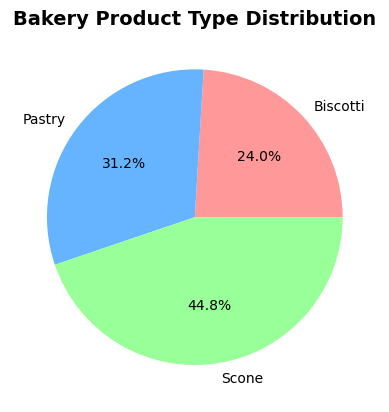

In [1815]:
plt.pie(category_sales5['Bakery'].values,
        labels=category_sales5['Bakery'].index.astype(str).tolist(),
       autopct='%1.1f%%',
        colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # custom colors
       )
plt.title("Bakery Product Type Distribution", fontsize=14, fontweight="bold")
plt.show()

* Top-Selling Products (by Sales)

In [1786]:
top_selling = df.groupby('product_type')['total_sales'].sum().nlargest().reset_index()
top_selling

,product_type,total_sales
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00


* Top-Selling Products (by Sold Quantities)

In [1787]:
top_selling = df.groupby('product_type')['transaction_qty'].sum().nlargest().reset_index()
top_selling

,product_type,transaction_qty
0,Brewed Chai tea,26250
1,Gourmet brewed coffee,25973
2,Barista Espresso,24943
3,Brewed Black tea,17462
4,Hot chocolate,17457


In [1788]:
print(df['transaction_time'].dtypes)

object


In [1789]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')
df['transaction_time']

0        1900-01-01 07:06:11
1        1900-01-01 07:08:56
2        1900-01-01 07:14:04
3        1900-01-01 07:20:24
4        1900-01-01 07:22:41
                 ...        
149111   1900-01-01 20:18:41
149112   1900-01-01 20:25:10
149113   1900-01-01 20:31:34
149114   1900-01-01 20:57:19
149115   1900-01-01 20:57:19
Name: transaction_time, Length: 149116, dtype: datetime64[ns]

In [1790]:
df['hour']=pd.to_datetime(df.transaction_time).dt.hour
df['hour']

0          7
1          7
2          7
3          7
4          7
          ..
149111    20
149112    20
149113    20
149114    20
149115    20
Name: hour, Length: 149116, dtype: int32

# Time based analysis

## Daily_analysis

In [1791]:
daily_analysis = df.groupby([df['transaction_date'].dt.date,'week_name'])['total_sales'].sum().reset_index()
daily_analysis

,transaction_date,week_name,total_sales
0,2023-01-01,Sunday,2508.20
1,2023-01-02,Monday,2403.35
2,2023-01-03,Tuesday,2565.00
3,2023-01-04,Wednesday,2220.10
4,2023-01-05,Thursday,2418.85
...,...,...,...
176,2023-06-26,Monday,5875.90
177,2023-06-27,Tuesday,5975.65
178,2023-06-28,Wednesday,4728.90
179,2023-06-29,Thursday,4450.75


In [1792]:
avg_daily_analysis = daily_analysis.groupby('week_name')['total_sales'].mean()
avg_daily_analysis

week_name
Friday       3898.961538
Monday       3910.664615
Saturday     3875.779200
Sunday       3781.935000
Thursday     3875.683846
Tuesday      3825.228462
Wednesday    3858.213077
Name: total_sales, dtype: float64

In [1793]:
avg_daily_analysis = avg_daily_analysis.reindex(list(calendar.day_name))
avg_daily_analysis

week_name
Monday       3910.664615
Tuesday      3825.228462
Wednesday    3858.213077
Thursday     3875.683846
Friday       3898.961538
Saturday     3875.779200
Sunday       3781.935000
Name: total_sales, dtype: float64

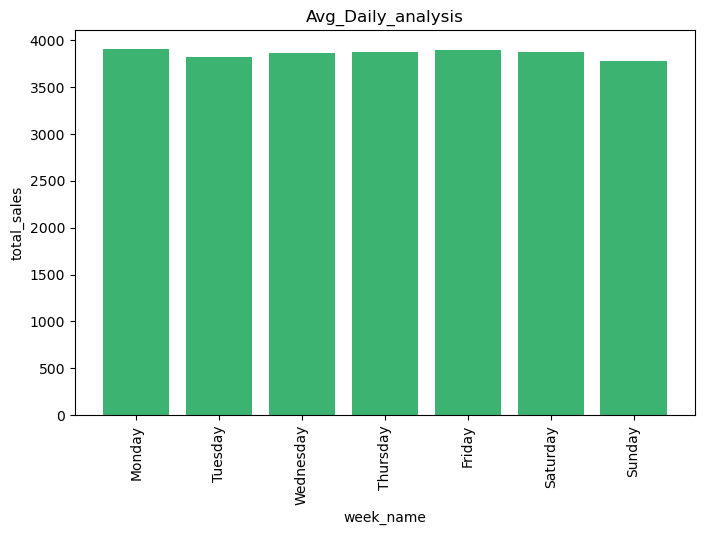

In [1794]:
plt.figure(figsize=(8,5))
plt.bar(avg_daily_analysis.index,avg_daily_analysis.values,color=['mediumseagreen'])
plt.title("Avg_Daily_analysis")
plt.xlabel("week_name")
plt.ylabel("total_sales")
plt.xticks(rotation=90)
plt.show()

## Hourly Analysis

In [1795]:
hourly_analysis = df.groupby([df.transaction_date.dt.date,'hour'])['total_sales'].sum().reset_index()
hourly_analysis

,transaction_date,hour,total_sales
0,2023-01-01,7,81.05
1,2023-01-01,8,85.90
2,2023-01-01,9,186.35
3,2023-01-01,10,127.35
4,2023-01-01,11,236.25
...,...,...,...
2507,2023-06-30,16,185.30
2508,2023-06-30,17,221.45
2509,2023-06-30,18,208.90
2510,2023-06-30,19,195.95


In [1796]:
avg_hourly_analysis = hourly_analysis.groupby('hour')['total_sales'].mean()
avg_hourly_analysis

hour
6     210.579519
7     350.974972
8     456.905359
9     470.549890
10    489.908232
11    255.906851
12    222.059613
13    223.024586
14    228.202983
15    230.569613
16    227.197514
17    221.736519
18    189.426519
19    157.163978
20     53.375273
Name: total_sales, dtype: float64

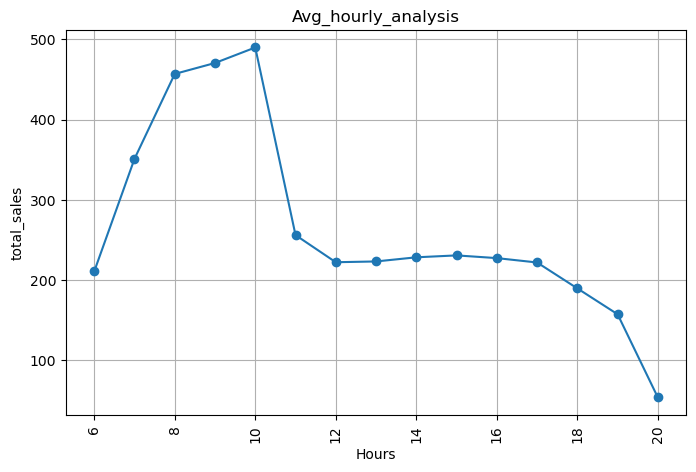

In [1797]:
plt.figure(figsize=(8,5))
plt.plot(avg_hourly_analysis.index,avg_hourly_analysis.values, marker='o')
plt.title("Avg_hourly_analysis")
plt.xlabel("Hours")
plt.ylabel("total_sales")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [1798]:
df.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

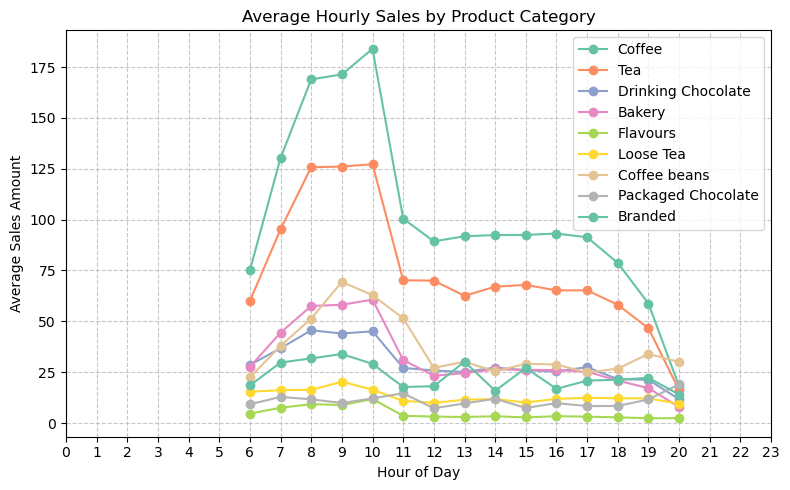

In [1826]:


plt.figure(figsize=(8,5))

# pick a seaborn palette
colors = sns.color_palette("Set2", n_colors=len(df.product_category.unique()))

for i, category_name in enumerate(df.product_category.unique()):
    category = df[df.product_category == category_name]
    hourly_analysis = category.groupby(
        [category.transaction_date.dt.date, 'hour']
    )['total_sales'].sum().reset_index()

    avg_hourly_analysis = hourly_analysis.groupby('hour')['total_sales'].mean()

    plt.plot(
        avg_hourly_analysis.index,
        avg_hourly_analysis.values,
        marker='o',
        label=category_name,
        color=colors[i]
    )

plt.title("Average Hourly Sales by Product Category")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales Amount")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('category_hour.png')
plt.show()

